In [26]:
##### Pymaceuticals Inc.


### Analysis
# The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, 
# against the other treatment regimens. 249 mice who were identified with SCC tumours, were given a range range of drug 
# regimens including Capomulin. £Over the course of 45 days, tumour development was observed and measured 
# and captured. 

# In order to provide the technical report for the clincal study, the data had to ordered and sorted to generate sumrray 
# statistics from which several charts were produced to facilitate the review.

# From the analysis undertaken the following observations can be made:

#     1 - The Capomulin treatement regimen appears to be an effective treatment in the reduction of SSC tumors in mice when 
#         compared to other treatment regimens when noting the reduction of tumour volume over time.

#     2 - While Capomulin has performed well in the study, Ramicane has performed equally if not slighly better than
#         Capomulin when assessing the final tumour volume at the last day of the study. It is worth noting that less mice 
#         received the Ramicane regimen when compapred to Capomulin thus it could have an impact on the analysis for Ramicane - 
#         further analysis may be needed.

#     3 - There is a strong correlation between the weight of the mice and the average tumour volume for the Capomulin
#         treatment regimen which should be taken into consideration for future studies.

#     4 - The is analysis suggests that Capomulin treatment reduces tumour volume between 5 to 26 days however it was noted
#         that tumour volume the increases again from days 30 to 45. Further analysis will be required.



In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_original_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")
# Display the data table for preview
combined_original_data_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Checking the number of mice.
combined_original_data_df["Mouse ID"].nunique()


249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_original_data_df[combined_original_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_original_data_df.loc[combined_original_data_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_data_df = combined_original_data_df[combined_original_data_df.isin(duplicate_mouse) == False]


In [32]:
# Checking the number of mice in the clean DataFrame.
cleaned_combined_data_df["Mouse ID"].nunique()


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regime_data_df = cleaned_combined_data_df.groupby(["Drug Regimen"])

drug_regime_data_mean = drug_regime_data_df["Tumour Volume (mm3)"].mean() 

drug_regime_data_median = drug_regime_data_df["Tumour Volume (mm3)"].median()

drug_regime_data_variance = drug_regime_data_df["Tumour Volume (mm3)"].var()

drug_regime_data_std_dev = drug_regime_data_df["Tumour Volume (mm3)"].std() 

drug_regime_data_SEM = drug_regime_data_df["Tumour Volume (mm3)"].sem()


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
tumor_vol_drug_summary_df = pd.DataFrame({
                "Mean Tumor Volume" : drug_regime_data_mean ,
                "Median Tumor Volume" : drug_regime_data_median,
                "Tumor Volume Variance" : drug_regime_data_variance,
                "Tumor Volume Std. Dev." : drug_regime_data_std_dev,
                "Tumor Volume Std. Err" : drug_regime_data_SEM })

tumor_vol_drug_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_aggregate_summary_df=cleaned_combined_data_df.groupby("Drug Regimen").agg({"Tumour Volume (mm3)" : ["mean","median", "var","std","sem"]})

tumor_vol_aggregate_summary_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

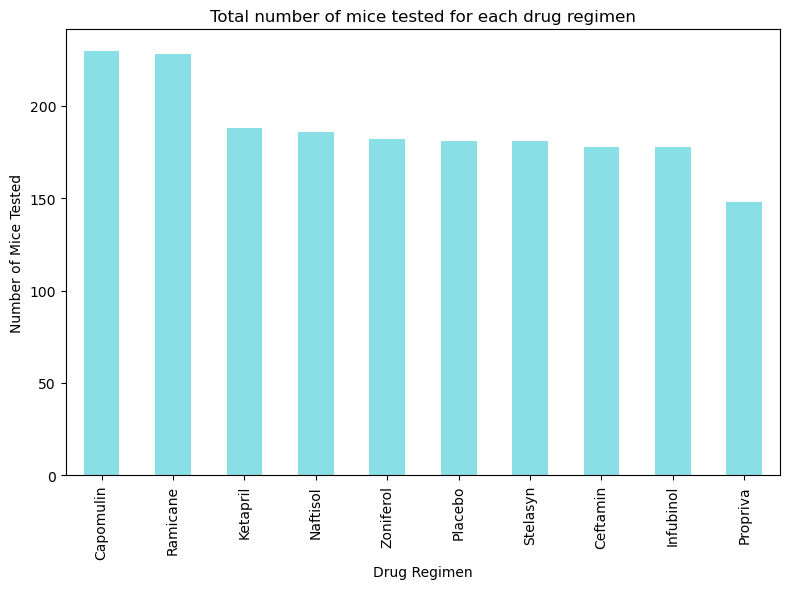

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_list = cleaned_combined_data_df.groupby(["Drug Regimen"])

mouse_count = drug_list ["Mouse ID"].count()
mouse_count = mouse_count.sort_values(ascending=False)

mouse_count_chart = mouse_count.plot(kind="bar", title="Total number of mice tested for each drug regimen", 
                                     figsize = (8,6), align="center", color = "C9", alpha = 0.5)

mouse_count_chart.set_xlabel("Drug Regimen")
mouse_count_chart.set_ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()


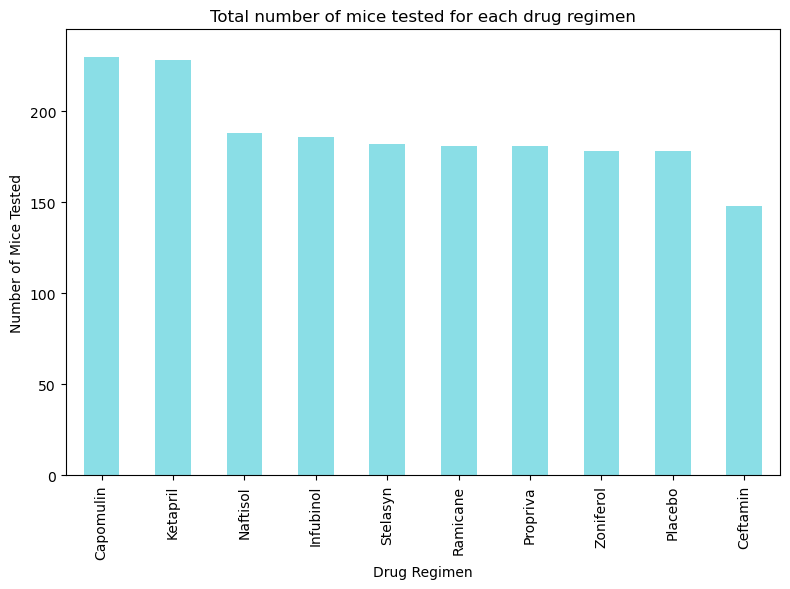

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_x = combined_original_data_df["Drug Regimen"].unique()

mouse_count_y = mouse_count

x_axis = np.arange(len(drug_regimen_x))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


plt.figure(figsize=(8,6))
plt.title("Total number of mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.5, len(drug_regimen_x)-.5)
plt.ylim(0, max(mouse_count_y) + 15)

plt.bar(x_axis, mouse_count_y, width=0.5, align="center", color = "C9", alpha = 0.5)
plt.xticks(tick_locations, drug_regimen_x, rotation ="vertical")

plt.style.use
plt.tight_layout()
plt.show()



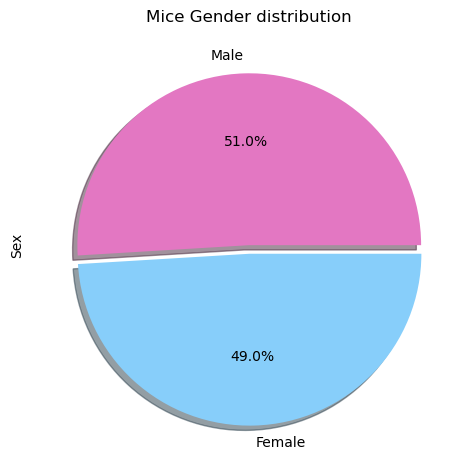

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = cleaned_combined_data_df["Sex"].value_counts()

explode = [0.0,0.05]
colors = ["C6", "Lightskyblue"]
data_format = "%1.1f%%"

mice_gender_pie = gender_count.plot(kind ="pie", y="Sex", title=("Mice Gender distribution"), 
                                    autopct=data_format, explode = explode, colors = colors, 
                                    shadow =True, startangle=0)
plt.ylabel("Sex")

plt.tight_layout()
plt.show()


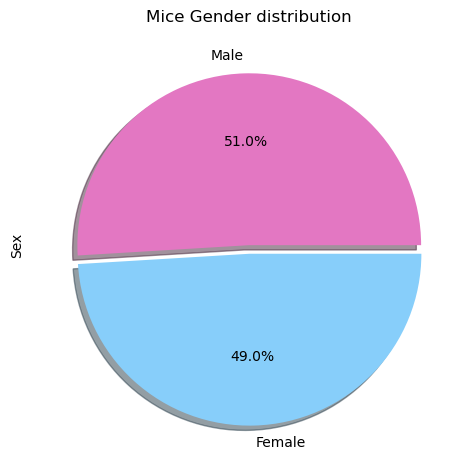

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mice Gender distribution")

gender_count_2 = cleaned_combined_data_df["Sex"].value_counts()
labels = gender_count_2.index


plt.pie(gender_count_2.values, explode = explode, labels=labels, 
        colors = colors,autopct=data_format, shadow =True, startangle=0)

plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouping = cleaned_combined_data_df.groupby(["Mouse ID"])
mouse_timepoint_greatest = mouse_grouping["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
cleaned_combined_data_df_2 = pd.merge(cleaned_combined_data_df, mouse_timepoint_greatest, on = "Mouse ID")

# Renaming the Timepoint columns
cleaned_combined_data_df_2.rename(columns = {"Timepoint_x" : "Timepoint", "Timepoint_y" : "Timepoint Max"},inplace = True)



In [17]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumour vol data (for plotting)

drug_list = []
tumour_vol_list =[]
mouse_id = []


# Identifying the maxmium time point for each mouse and creating a list for the mouse ID, Drug Regimen, and Max Tumour volume
for index in cleaned_combined_data_df_2.index:
    if (cleaned_combined_data_df_2["Timepoint"][index] == cleaned_combined_data_df_2["Timepoint Max"][index])\
    & ((cleaned_combined_data_df_2["Drug Regimen"][index] == "Capomulin")| \
    (cleaned_combined_data_df_2["Drug Regimen"][index] == "Ramicane")| \
    (cleaned_combined_data_df_2["Drug Regimen"][index] == "Infubinol")| \
    (cleaned_combined_data_df_2["Drug Regimen"][index] == "Ceftamin")):
        mouse = cleaned_combined_data_df_2["Mouse ID"][index]
        mouse_id.append(mouse)
        drug = cleaned_combined_data_df_2["Drug Regimen"][index]
        drug_list.append(drug)
        tumour = cleaned_combined_data_df_2["Tumour Volume (mm3)"][index]
        tumour_vol_list.append(tumour)
        
# Stoing the list data captured above into the dataframe
max_tumor_vol_drug_summary_df = pd.DataFrame({
                "Mouse ID" : mouse_id ,
                "Drug Regimen" : drug_list ,
                "Max Tumour Volume" : tumour_vol_list})


# Sorting each of the Drug Regimen Tumor Volume boundries as to identify and print any outliers found. 

### Capomulin Data

Capomulin_data_df = max_tumor_vol_drug_summary_df.loc[max_tumor_vol_drug_summary_df["Drug Regimen"] == "Capomulin"]

Capomulin_quartiles = Capomulin_data_df["Max Tumour Volume"].quantile([.25,.5,.75])
lowerq = Capomulin_quartiles[0.25]
upperq = Capomulin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Capomulin_outlier_tumour = Capomulin_data_df.loc[(Capomulin_data_df["Max Tumour Volume"] < lower_bound) | (Capomulin_data_df["Max Tumour Volume"]  > upper_bound)]

print(f"Capomulin potential outliers :\n  {Capomulin_outlier_tumour}")

###  Ramicane Data 
    
Ramicane_data_df = max_tumor_vol_drug_summary_df.loc[max_tumor_vol_drug_summary_df["Drug Regimen"] == "Ramicane"]

Ramicane_quartiles = Ramicane_data_df["Max Tumour Volume"].quantile([.25,.5,.75])
lowerq = Ramicane_quartiles[0.25]
upperq = Ramicane_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ramicane_outlier_tumour = Ramicane_data_df.loc[(Ramicane_data_df["Max Tumour Volume"] < lower_bound) | (Ramicane_data_df["Max Tumour Volume"]  > upper_bound)]

print(f"Ramicane's potential outliers :\n  {Ramicane_outlier_tumour}")

### Infubinol Data 

Infubinol_data_df = max_tumor_vol_drug_summary_df.loc[max_tumor_vol_drug_summary_df["Drug Regimen"] == "Infubinol"]

Infubinol_quartiles = Infubinol_data_df["Max Tumour Volume"].quantile([.25,.5,.75])
lowerq = Infubinol_quartiles[0.25]
upperq = Infubinol_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Infubinol_outlier_tumour = Infubinol_data_df.loc[(Infubinol_data_df["Max Tumour Volume"] < lower_bound) | (Infubinol_data_df["Max Tumour Volume"] > upper_bound)]

print(f"Infubinol's potential outliers :\n  {Infubinol_outlier_tumour}")

###  Ceftamin Data 
Ceftamin_data_df = max_tumor_vol_drug_summary_df.loc[max_tumor_vol_drug_summary_df["Drug Regimen"] == "Ceftamin"]

Ceftamin_quartiles = Ceftamin_data_df["Max Tumour Volume"].quantile([.25,.5,.75])
lowerq = Ceftamin_quartiles[0.25]
upperq = Ceftamin_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ceftamin_outlier_tumour = Ceftamin_data_df.loc[(Ceftamin_data_df["Max Tumour Volume"] < lower_bound) | (Ceftamin_data_df["Max Tumour Volume"] > upper_bound)]

print(f"Ceftamin's potential outliers :\n {Ceftamin_outlier_tumour}")
    
   

Capomulin potential outliers :
  Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Max Tumour Volume]
Index: []
Ramicane's potential outliers :
  Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Max Tumour Volume]
Index: []
Infubinol's potential outliers :
    Mouse ID Drug Regimen  Max Tumour Volume
1     c326    Infubinol          36.321346
Ceftamin's potential outliers :
 Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Max Tumour Volume]
Index: []


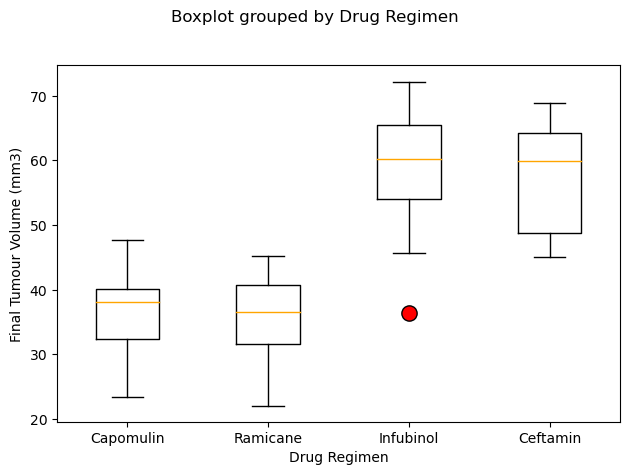

In [18]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

Max_Tumour_Box_Plot = max_tumor_vol_drug_summary_df.boxplot(by = "Drug Regimen", column = "Max Tumour Volume", \
                                                           grid = False, positions = [1,4,3,2], medianprops=dict(color="orange"), \
                                                         boxprops=dict(color="black"), whiskerprops=dict(color="black"), \
                                                           flierprops=dict(color= "black", markerfacecolor="red", markersize=11, ))




plt.title(" ")
plt.ylabel("Final Tumour Volume (mm3)")
plt.tight_layout()
plt.show()


## Line and Scatter Plots

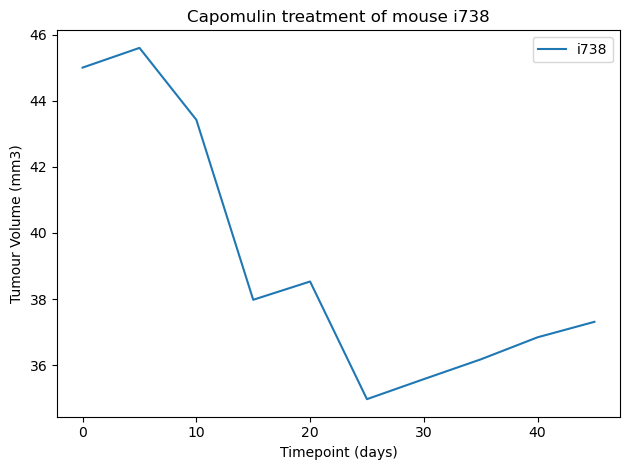

In [25]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

Capomulin_regime_data_df = cleaned_combined_data_df_2.loc[cleaned_combined_data_df_2["Drug Regimen"] == "Capomulin"]
Capomulin_regime_data_df

Capomulin_mouse_data_df = Capomulin_regime_data_df.loc[Capomulin_regime_data_df["Mouse ID"] == "i738"]

Copomulin_time = Capomulin_mouse_data_df[("Timepoint")]
Capomulin_tumour_vol = Capomulin_mouse_data_df[("Tumour Volume (mm3)")]

plt.plot(Copomulin_time, Capomulin_tumour_vol,)

plt.title("Capomulin treatment of mouse i738")
plt.legend(["i738"], loc="best")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumour Volume (mm3)")
plt.tight_layout()
plt.show()

        

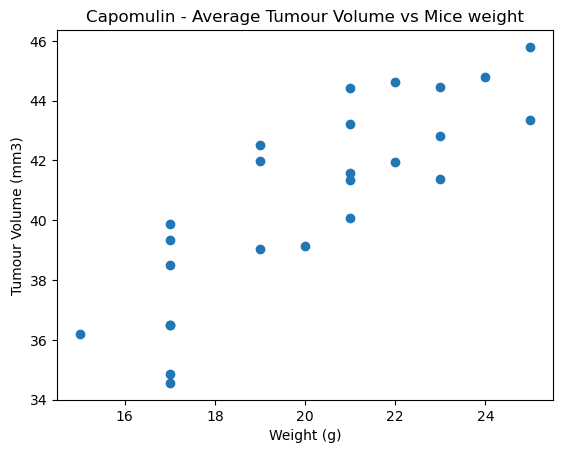

In [20]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

Capomulin_mice = Capomulin_regime_data_df.groupby(["Mouse ID"])

Capomulin_weight = Capomulin_mice["Weight (g)"].mean()
Capomulin_avg_tumorvol = Capomulin_mice["Tumour Volume (mm3)"].mean()

Capomulin_df = pd.DataFrame({
                    "Capo_Weight" : Capomulin_weight,
                    "Capu_Avg_TumVol" : Capomulin_avg_tumorvol
                            })

Capo_Weight_Scat = Capomulin_df["Capo_Weight"]
Capo_Tumor_Scat = Capomulin_df["Capu_Avg_TumVol"]

plt.title("Capomulin - Average Tumour Volume vs Mice weight")
plt.scatter(Capo_Weight_Scat, Capo_Tumor_Scat)
plt.xlabel("Weight (g)")
plt.ylabel('Tumour Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


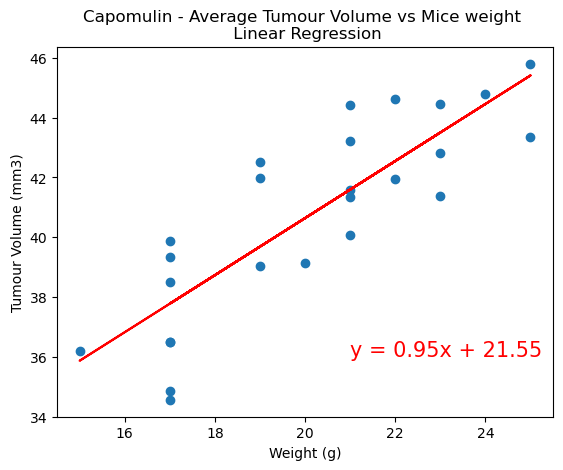

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(Capo_Weight_Scat, Capo_Tumor_Scat)
regress_values = Capo_Weight_Scat * slope + intercept

correlation = st.pearsonr(Capo_Weight_Scat, Capo_Tumor_Scat)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Capomulin - Average Tumour Volume vs Mice weight \n Linear Regression")
plt.scatter(Capo_Weight_Scat, Capo_Tumor_Scat)
plt.plot(Capo_Weight_Scat,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel('Tumour Volume (mm3)')
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.show()

